<a href="https://colab.research.google.com/github/Sammy-Mutua/DSC14B-WEEK-9-IP---Samuel-Mutua/blob/main/K_Nearest_Neighbours_Samuel_Mutua_Week_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Independent Week 9 Independent Project - K Nearest Neighbours(KNN)



## 1. Defining the Question

### a) Specifying the Question


> Implementing a K-nearest neighbor (kNN) classifier on the provided dataset. Determine whether a passenger survived the accident or not.



### b) Defining the Metric for Success

Implementing the best optimal KNN Classifier on the dataset provided that would be able to accurately predicted if a passenger survived the titanic accident or not

### c) Understanding the context 

> The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. 

**Data Glossary**

• Survived: This feature has value 0 and 1. 0 for not survived and 1 for survived.

• Pclass: There are 3 classes: Class 1, Class 2 and Class 3.

• Name: Name of passenger.

• Sex: Gender of passenger.

• Age: Age of passenger.

• SibSp: Indication that passengers have siblings and spouses.

• Parch: Whether a passenger is alone or has a family.

• Ticket: Ticket number of passenger.

• Fare: Indicating the fare.

• Cabin: The cabin of passenger.

• Embarked: The port embarked category; C = Cherbourg, Q = Queenstown, S = Southampton

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, and bivariate analysis recording your observations.

6. Randomly partition each dataset into two parts i.e 80 - 20 sets
7. Performing perform K-nearest neighbor classification.

8. Compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.

9. Repeat step 6 to step 7 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
10. Suggest and apply at least one of the optimization techniques that you learned earlier this week. Provide further recommendations to improve both classifiers.
Provide a recommendation based on your analysis.

## 2. Reading the Data

In [ ]:
#importing our necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
# Loading dataset
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# The test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 
train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# The test dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking whether each column has an appropriate datatype
#
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Checking Unique values
print(train.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [ ]:
# previewing the columns of the datasets
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Summary of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistical Summary
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#
# checking count of null values
train.isnull().sum()

# there are null values in the age, cabin and embarked column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# converting the column names to lowercase
# 
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# Dealing with the Missing Data
#
# imputing the missing age values with the mean

train.groupby(['pclass', 'sex'])['age'].mean()

[train['age'].fillna(train.groupby(['pclass','sex'])['age'].transform('mean'), inplace=True)]

[None]

In [ ]:
# drop the cabin column since it has about 77% missing values
# 
train.drop(['cabin'], axis=1, inplace=True)
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
dtype: int64

In [ ]:
# replacing the null values in the embarked column by 0
train1 = train.fillna(0)
train1

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C


In [ ]:
train1.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [ ]:
# determing the entries present after dealing with missing values
# 
train1.shape

(891, 11)

In [ ]:
# describing the numerical features
train1.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# dropping redundant columns from dataset
train1 = train1.drop(['passengerid'], axis=1)

# this is because it is not essential for the modelling process

In [ ]:
train1.drop(['name', 'ticket'], axis=1, inplace=True)
train1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train1.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

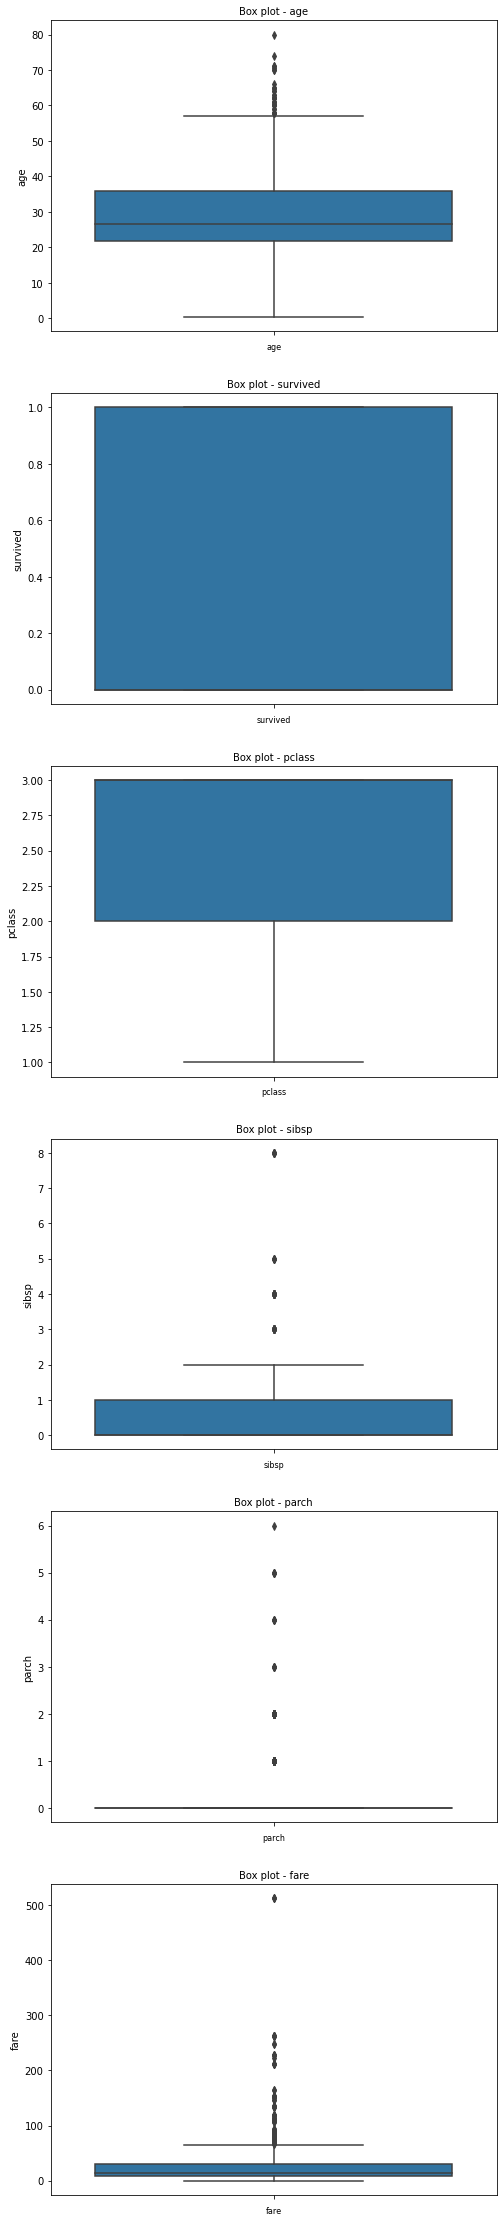

In [ ]:
# checking for outliers
# 

import matplotlib.pyplot as plt
import seaborn as sns

num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

fig, ax = plt.subplots(len(num_col), figsize=(8,40))

for i, col_val in enumerate(num_col):

    sns.boxplot(y=train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

## 5. Exploratory Analysis

**I. Univariate Analysis**

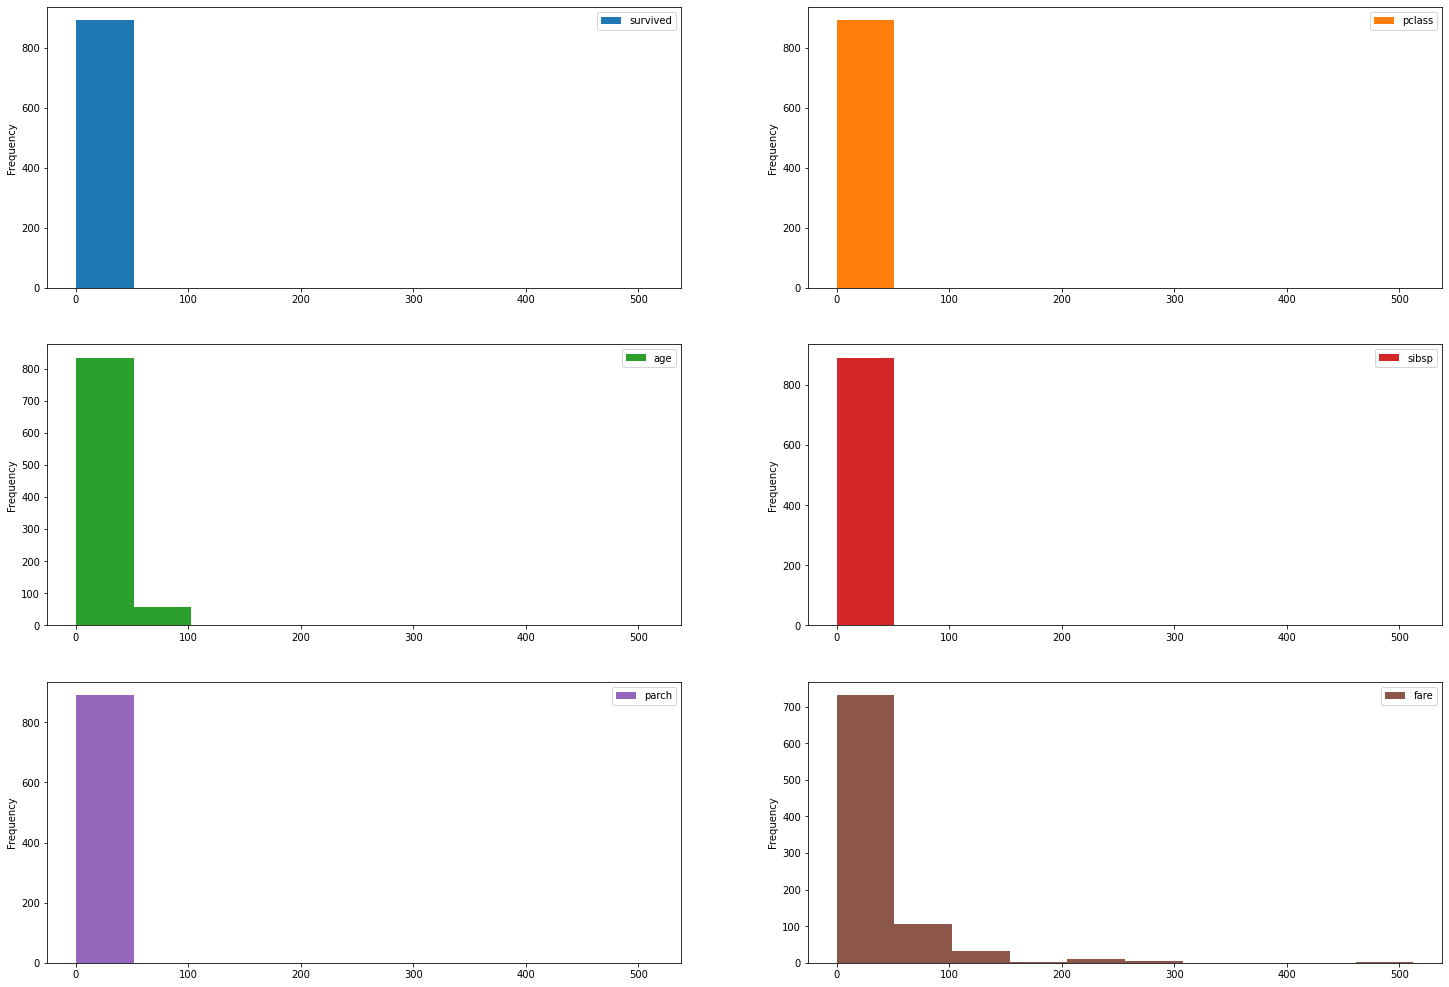

In [ ]:
# Ploting the univariate summaries and recording our observations
#
# plot histograms of the variables
plt.rcParams['figure.figsize']=(25,30)
train1.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

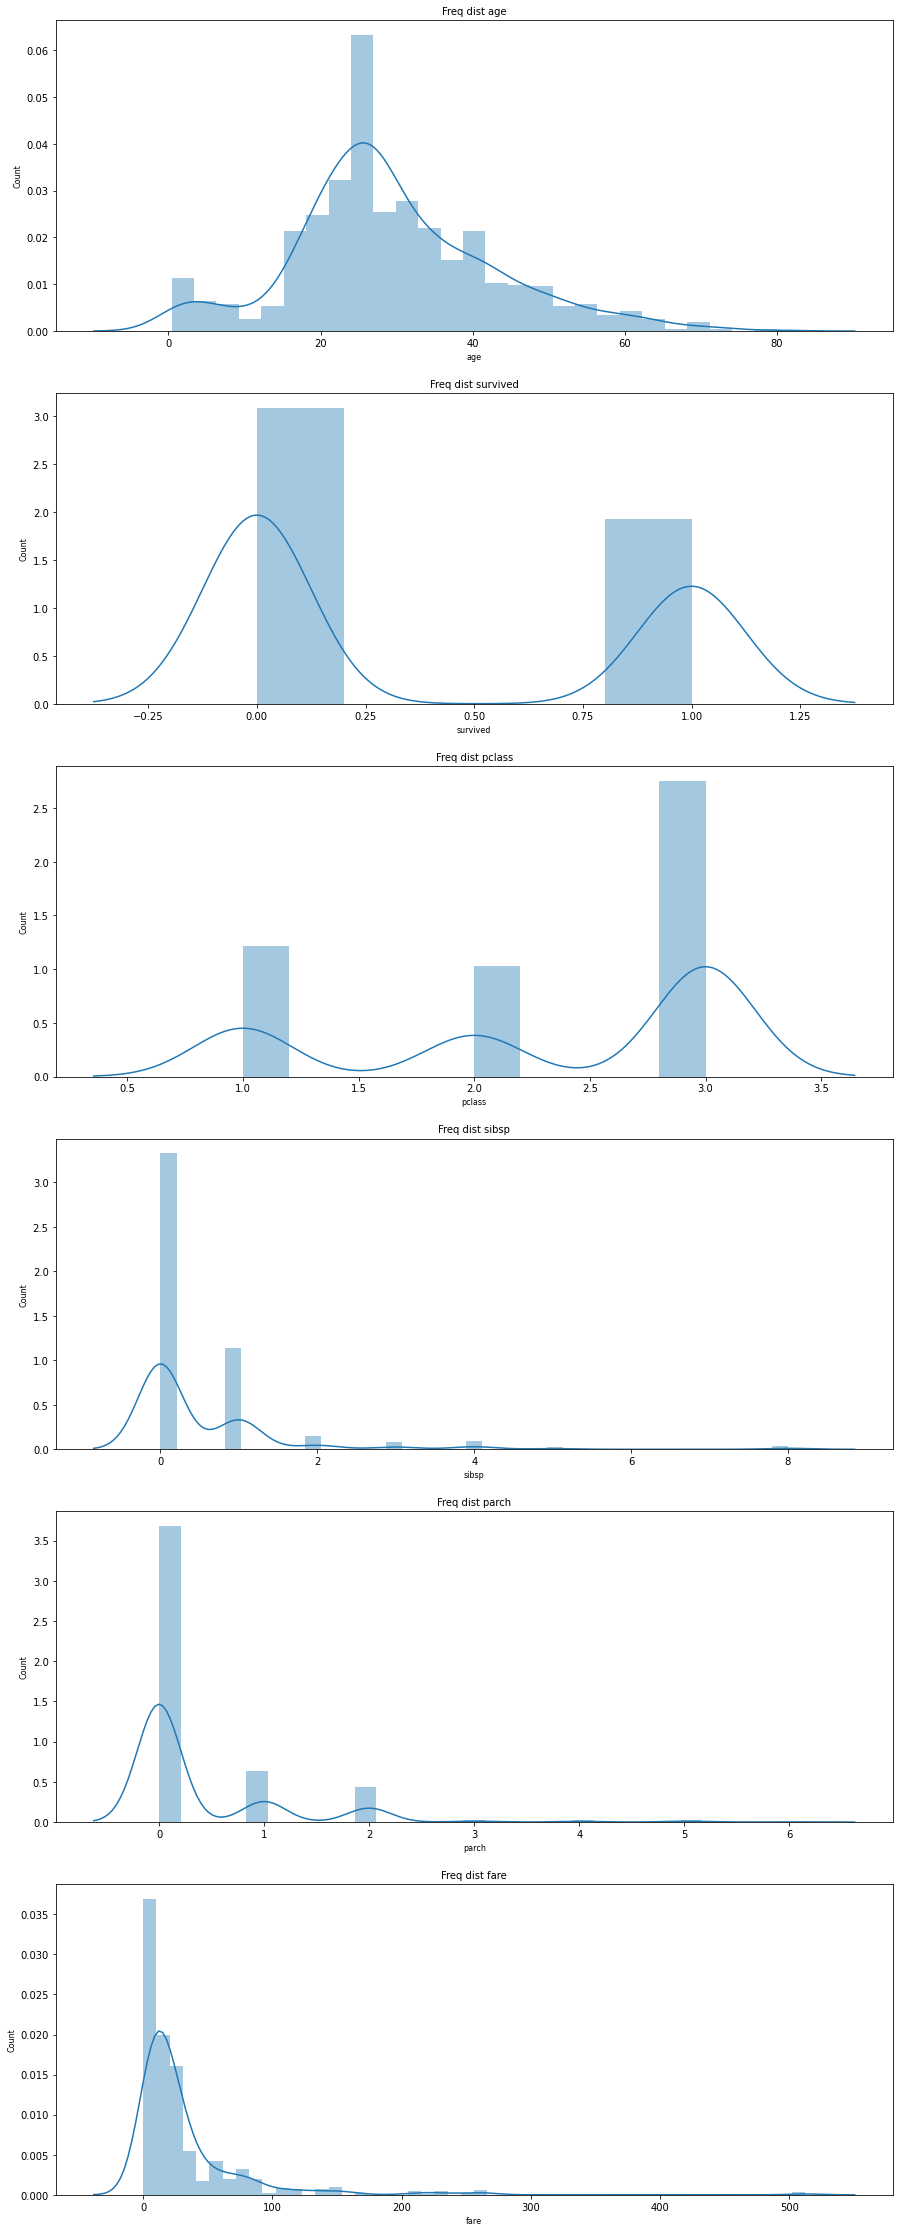

In [ ]:
# Ploting a summary of the distribution of numerical columns which contains histograms and estimated PDF
#
num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

fig, ax = plt.subplots(len(num_col), figsize=(15,40))

for i, col_val in enumerate(num_col):

    sns.distplot(train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [ ]:
# statistical summary of the continuous variables
# 
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# getting the median of the continuous variables

num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

median1 = train1[num_col].median()

median1.sort_values(ascending=False)

age         26.507589
fare        14.454200
pclass       3.000000
survived     0.000000
sibsp        0.000000
parch        0.000000
dtype: float64

In [ ]:
# getting the skewness of the continuous variables
# 

num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

skewed = train[num_col].skew()

skewed.sort_values(ascending=False)

fare        4.787317
sibsp       3.695352
parch       2.749117
age         0.498421
survived    0.478523
pclass     -0.630548
dtype: float64

In [ ]:
# getting the kurtosis of the continuous variables
num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

kurt1 = train[num_col].kurt()

kurt1.sort_values(ascending=False)

fare        33.398141
sibsp       17.880420
parch        9.778125
age          0.715225
pclass      -1.280015
survived    -1.775005
dtype: float64

In [ ]:
# getting the variance of the continuous variables
# 
num_col = ['age','survived', 'pclass', 'sibsp', 'parch', 'fare']

var1 = train[num_col].var()

var1.sort_values(ascending=False)

fare        2469.436846
age          176.387691
sibsp          1.216043
pclass         0.699015
parch          0.649728
survived       0.236772
dtype: float64

**II. Bivariate Analysis**

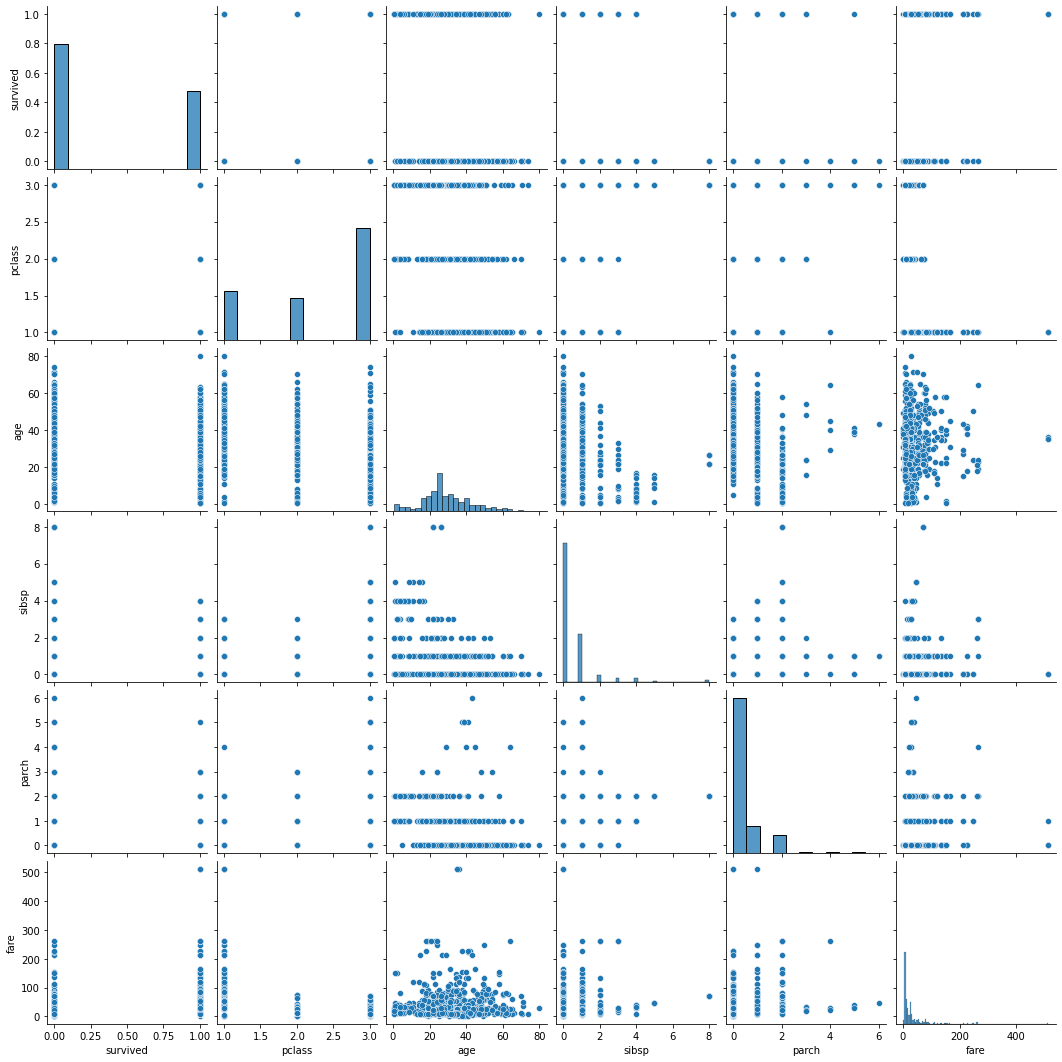

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(train1)
plt.show()

In [ ]:
# Correlation
correlation = train1.corr()
correlation


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500
age,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308
sibsp,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000


In [ ]:
# Checking Multicolliniearity
# compute the VIF
# 
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,survived,pclass,age,sibsp,parch,fare
survived,1.216745,0.477872,0.303850,0.130311,-0.088224,-0.088162
pclass,0.477872,1.938980,0.676428,-0.068606,-0.118472,0.899052
age,0.303850,0.676428,1.366117,0.248622,0.090755,0.072575
sibsp,0.130311,-0.068606,0.248622,1.295595,-0.456776,-0.208720
parch,-0.088224,-0.118472,0.090755,-0.456776,1.270391,-0.254902
fare,-0.088162,0.899052,0.072575,-0.208720,-0.254902,1.596566


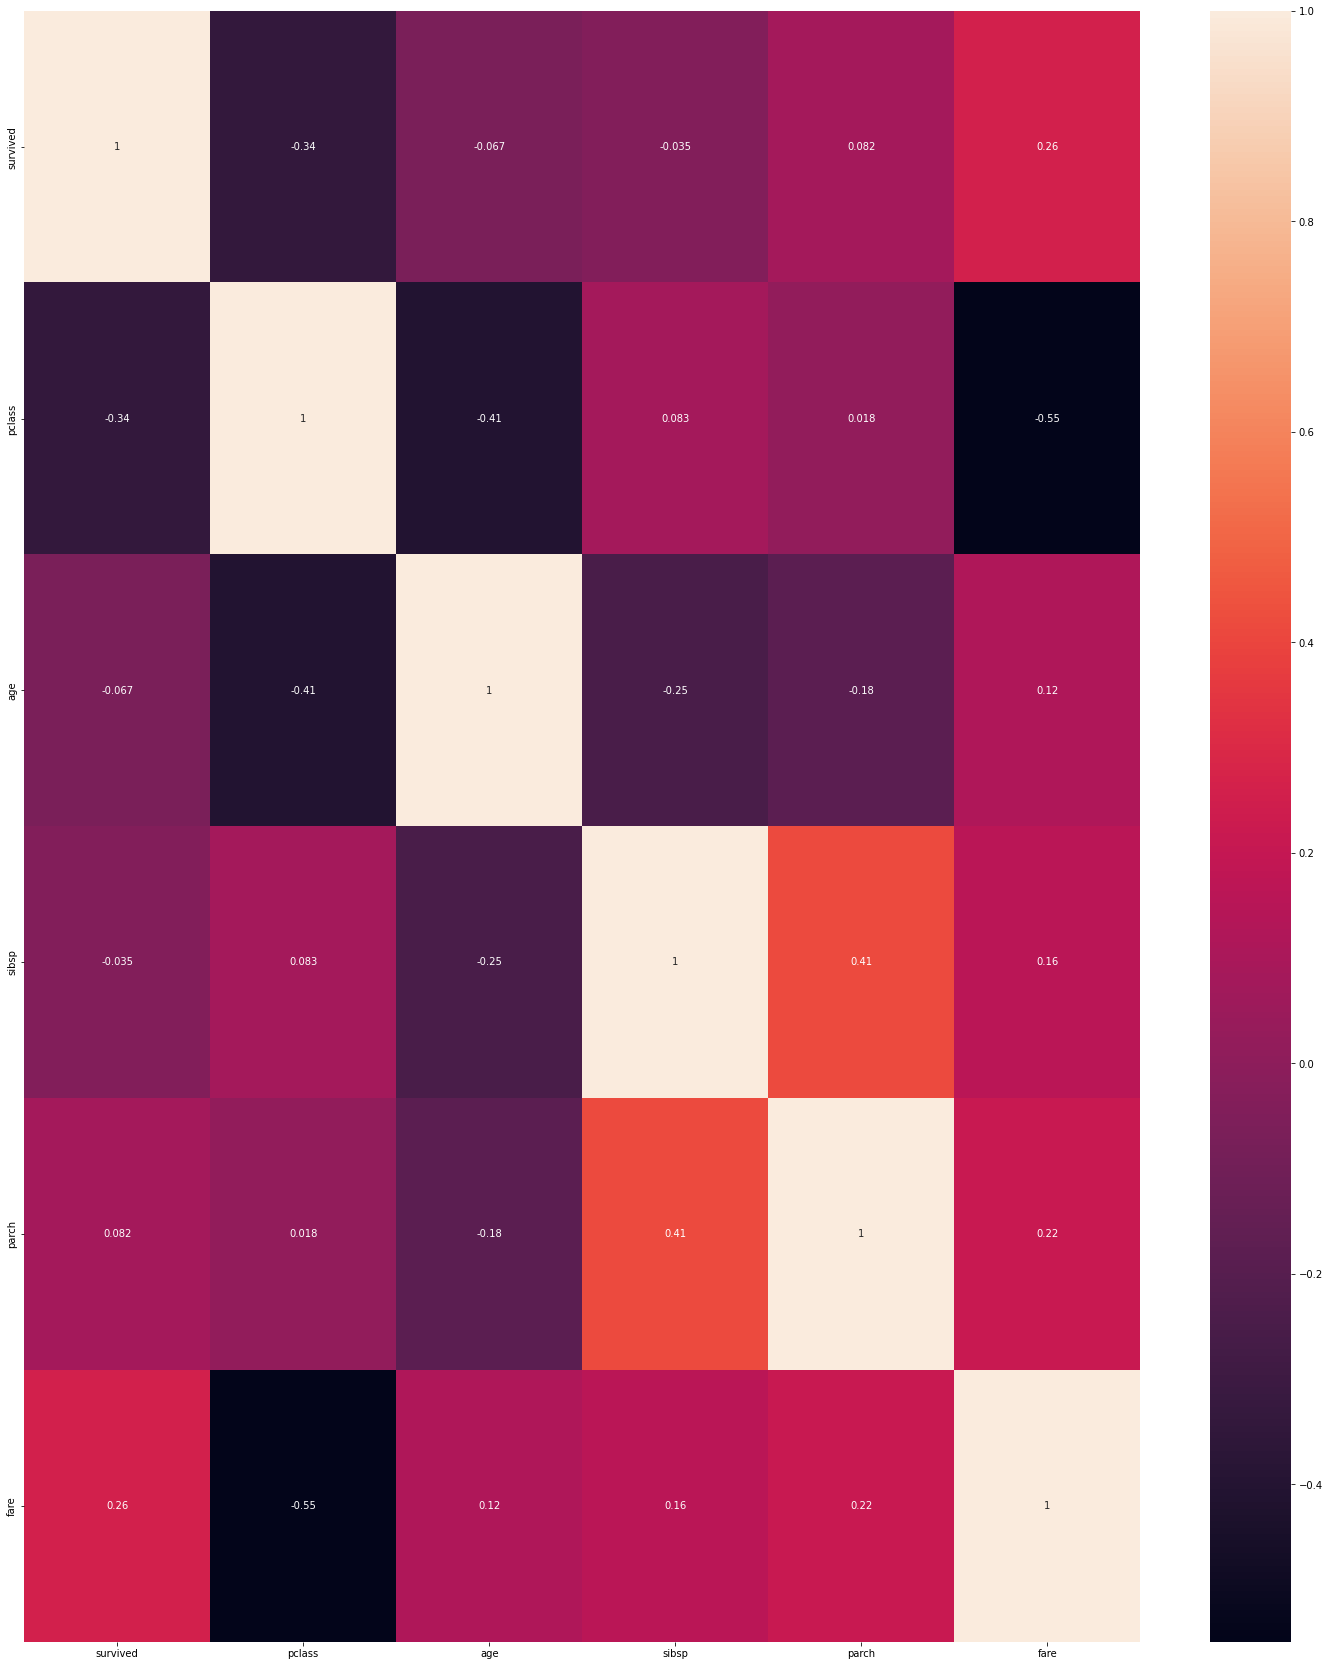

In [ ]:
# plotting the correlation using a heatmap
sns.heatmap(train1.corr(),annot=True)
plt.show()

## 6. Implementing the Solution

I. Splitting the data 80-20

In [ ]:
# Implementing the Solution
# 
train1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Implementing the Solution
# define our x and y
# 
test_features = train1.columns.to_list()
test_features.remove('survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['survived'].values

In [ ]:
# splitting data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# make predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,1,1
175,0,0
176,1,1
177,0,0


In [ ]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[101   9]
 [ 21  48]]
model accuracy 0.8324022346368715


II. Splitting the data 70-30

In [ ]:
# Implementing the Solution
# define our x and y
# 
test_features = train1.columns.to_list()
test_features.remove('survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['survived'].values


In [ ]:
# splitting data into train and test sets
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# train our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# making predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame


,actual,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
263,0,0
264,0,0
265,0,0
266,1,0


In [ ]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.85       168
           1       0.77      0.71      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[147  21]
 [ 29  71]]
model accuracy 0.8134328358208955


There is a reduction in accuracy from 83% from 81%

**III. Splitting the data 60-40**

In [ ]:
# defining our x and y
# 
test_features = train1.columns.to_list()
test_features.remove('survived')

X = train1[test_features]
X = pd.get_dummies(X)
y = train1['survived'].values

In [ ]:
# splitting data into train and test sets
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)


In [ ]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# train our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# making predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
352,0,0
353,0,0
354,1,1
355,0,0


In [ ]:
# evaluate performance of our model
# 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       221
           1       0.80      0.71      0.75       136

    accuracy                           0.82       357
   macro avg       0.82      0.80      0.81       357
weighted avg       0.82      0.82      0.82       357

[[197  24]
 [ 40  96]]
model accuracy 0.8207282913165266


A registered accuracy of 82%

## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)
#
grid_search = GridSearchCV(classifier,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)

range(1, 31)
{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=11),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [ ]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))


GridSearch CV best score : 0.8128


Parameters that give the best results : 

 {'n_neighbors': 11}


Estimator that was chosen by the search : 

 KNeighborsClassifier(metric='euclidean', n_neighbors=11)


In [ ]:
# calculating GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8207


**Conclusion**

the partitions were as follows along with their accuracy scores

80:20 - Model accuracy score: 0.8324

70:30 - Model accuracy score: 0.8134

60:40 - Model accuracy score: 0.8207

from the three partitions, the model that was more accurate was the one divided into 60:40 sets. this particular model had an accuracy score of 0.8207

the Parameters that gave the best results :

{'n_neighbors': 11}



## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Most Definitely

### b). Do we need other data to answer our question?

Additional data to shed more light on the features

### c). Did we have the right question?

As per our objective, then yes.